## libraries and setup

In [103]:
import otarpy as op

In [104]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Version Recursive

In [105]:
DT = 1 # min
SIMU_LENGTH = 72 # h

In [106]:
PEAK_MIN = 1
PEAK_MAX = 5
PEAK_PROB = 0.005
DECAY = 0.98

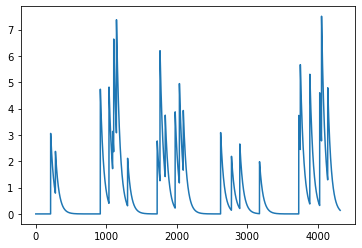

In [107]:
dose = np.zeros(DT * 60 * SIMU_LENGTH)
for i in range(len(dose)):
    if np.random.random() < PEAK_PROB:
        dose[i] = PEAK_MIN + np.random.random() * (PEAK_MAX - PEAK_MIN)
for i in range(1, len(dose)):
    dose[i] += DECAY * dose[i-1]
plt.plot(dose)
plt.show()

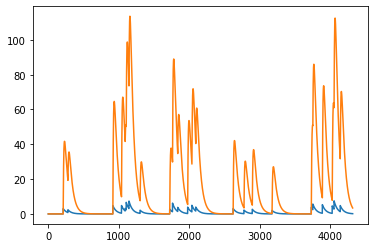

In [108]:
plt.plot(dose)
tk0=op.TkParams(ku=2, ke=0.1)
int=op.tk(dose,0, tk0)
plt.plot(int)

In [109]:
td0=op.TdParams(m50=2, slope=0.1)

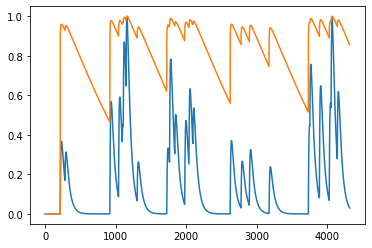

In [110]:
plt.plot(int / max(int))
effect = op.td(int, td0)
plt.plot(effect / max(effect))

# Version Différentielles

In [259]:
def dtk_dt(y, t, fint, ku, ke):
    dtk = fint(t) *ku - ke * y
    return  dtk
t = np.linspace(0, len(dose), len(dose))
fint = interp1d(t, dose)
ku, ke = 2, 0.5
tk_out = odeint(dtk_dt, 0.0, t[:-1], args=(fint, ku, ke))

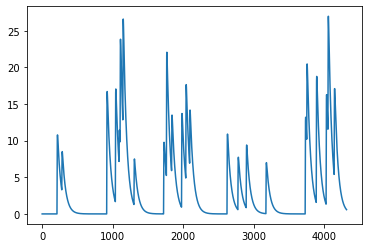

In [253]:
plt.plot(tk_out)

In [ ]:
tk0=op.TkParams(ku=2, ke=0.1)
int_ode=op.tk_ode(dose,0,tk0)
plt.plot(int_ode)